<a href="https://colab.research.google.com/github/MishaE-e/ml_fmi/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Набор данных: https://archive.ics.uci.edu/dataset/837/product+classification+and+clustering

In [227]:
import pandas as pd

2. Загрузка данных

In [228]:
df = pd.read_csv(u'pricerunner_aggregate.csv')

In [229]:
df

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
...,...,...,...,...,...,...,...
35306,47350,smeg fab28 60cm retro style right hand hinge f...,59,47517,Smeg FAB28 Cream,2623,Fridges
35307,47351,smeg fab28 60cm retro style left hand hinge fr...,59,47518,Smeg FAB28 Red,2623,Fridges
35308,47352,smeg fab28 60cm retro style left hand hinge fr...,59,47519,Smeg FAB28 Pink,2623,Fridges
35309,47355,candy 60cm built under larder fridge cru160nek,125,47524,Candy CRU16.0,2623,Fridges


3. Статистическая информация о наборе данных

In [230]:
print("Краткая информация:")
df.info()
print(f"\nРазмерность: {df.shape}")
print(f"\nВсего пропусков: {df.isnull().sum().sum()}")
print(f"\nПропусков по столбцам:\n{df.isnull().sum()}")
print(f"\nКоличество дубликатов: {df.duplicated().sum()}")

Краткая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB

Размерность: (35311, 7)

Всего пропусков: 0

Пропусков по столбцам:
Product ID         0
Product Title      0
 Merchant ID       0
 Cluster ID        0
 Cluster Label     0
 Category ID       0
 Category Label    0
dtype: int64

Количество дубликатов: 0


4. Вывод названий столбцов и строк

In [231]:
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")

print("\nНазвания столбцов:")
for i in range(len(df.columns)):
    print(f"{i+1}) {df.columns[i]}")

Количество строк: 35311
Количество столбцов: 7

Названия столбцов:
1) Product ID
2) Product Title
3)  Merchant ID
4)  Cluster ID
5)  Cluster Label
6)  Category ID
7)  Category Label


5. Замена категориальных данных на количественные

In [232]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"Найдено категориальных столбцов: {len(categorical_cols)}")
print(f"Список: {list(categorical_cols)}")

Найдено категориальных столбцов: 3
Список: ['Product Title', ' Cluster Label', ' Category Label']


In [233]:
from sklearn.preprocessing import LabelEncoder

In [234]:
df_new = df.copy()
df_new[' Category Label'] = LabelEncoder().fit_transform(df_new[' Category Label'])
df_new[' Cluster Label'] = LabelEncoder().fit_transform(df_new[' Cluster Label'])
df_new['Product Title'] = LabelEncoder().fit_transform(df_new['Product Title'])

In [235]:
df_new

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,2561,1,1,909,2612,7
1,2,2559,2,1,909,2612,7
2,3,2656,3,1,909,2612,7
3,4,2563,4,1,909,2612,7
4,5,2565,5,1,909,2612,7
...,...,...,...,...,...,...,...
35306,47350,27084,59,47517,11152,2623,5
35307,47351,27083,59,47518,11154,2623,5
35308,47352,27082,59,47519,11153,2623,5
35309,47355,6918,125,47524,2685,2623,5


6. Визуализировать данные с помощью Matplotlib и Seaborn

2 визуализации на каждый призн

/tmp/ipython-input-1178318443.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1178318443.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_len, x = 'Title_Length', y = ' Category Label', ax = axes[2], palette = 'viridis')


Text(0, 0.5, 'Категория')

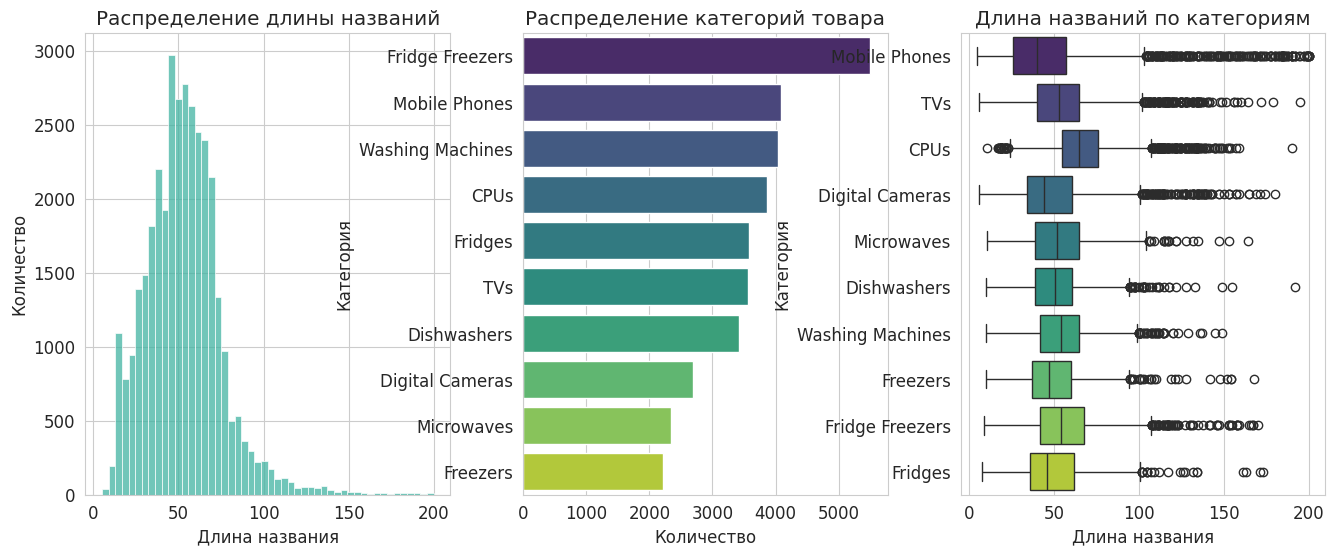

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#График распределение длины названий
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

df_len = df.copy()
df_len['Title_Length'] = df_len['Product Title'].str.len()

sns.histplot(data = df_len, x = 'Title_Length', bins = 50, ax = axes[0], color = '#41B3A2')
axes[0].set_title('Распределение длины названий')
axes[0].set_xlabel('Длина названия')
axes[0].set_ylabel('Количество')

#График количество товара
Category_Label = df[' Category Label'].value_counts()
sns.barplot(
    x = Category_Label.values,
    y = Category_Label.index,
    ax = axes[1],
    palette = 'viridis')

axes[1].set_title('Распределение категорий товара')
axes[1].set_xlabel('Количество')
axes[1].set_ylabel('Категория')

#График длина названий по категориям
Category_Label = df_len.groupby(' Category Label')['Title_Length'].median().sort_values(ascending = False).index
sns.boxplot(data = df_len, x = 'Title_Length', y = ' Category Label', ax = axes[2], palette = 'viridis')
axes[2].set_title('Длина названий по категориям')
axes[2].set_xlabel('Длина названия')
axes[2].set_ylabel('Категория')

3 групповых визуализаций

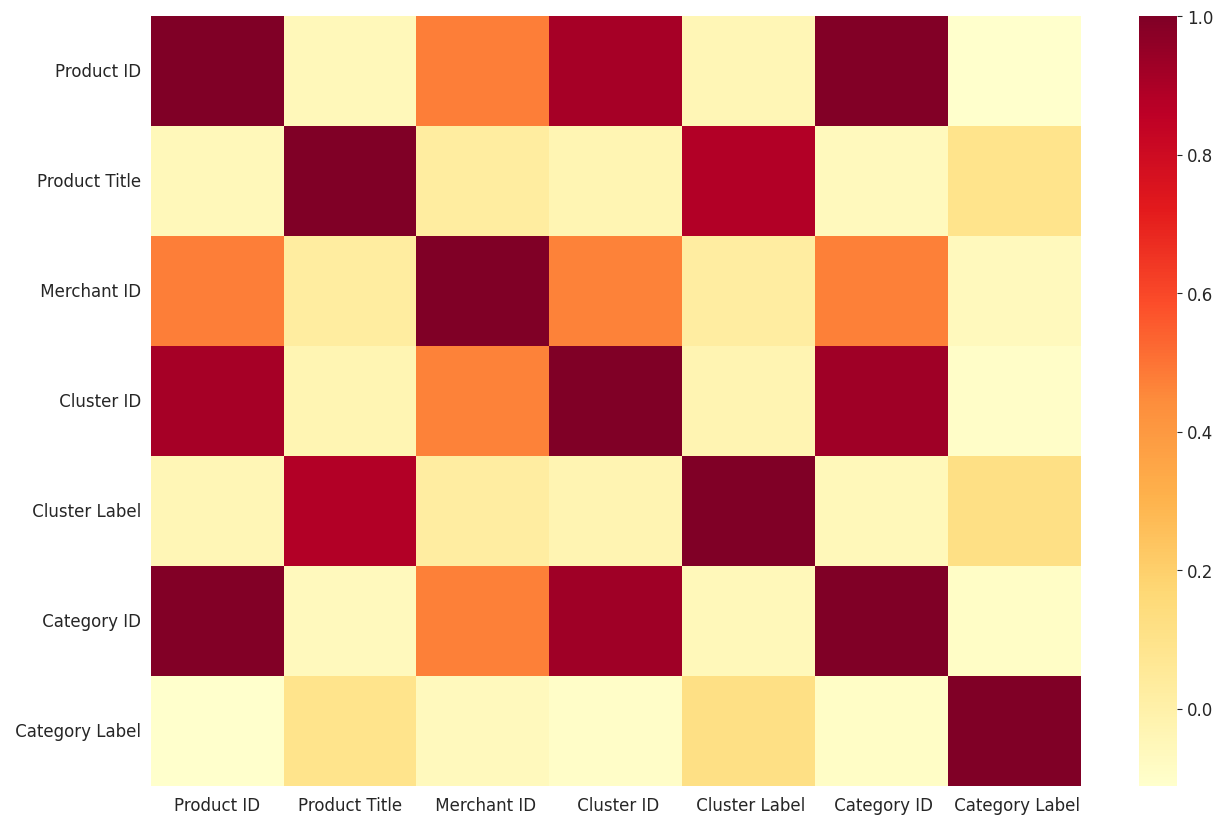

In [237]:
sns.heatmap(df_new.corr(numeric_only=True), cmap='YlOrRd');

Text(0.5, 1.0, 'Активность продавцов в категориях')

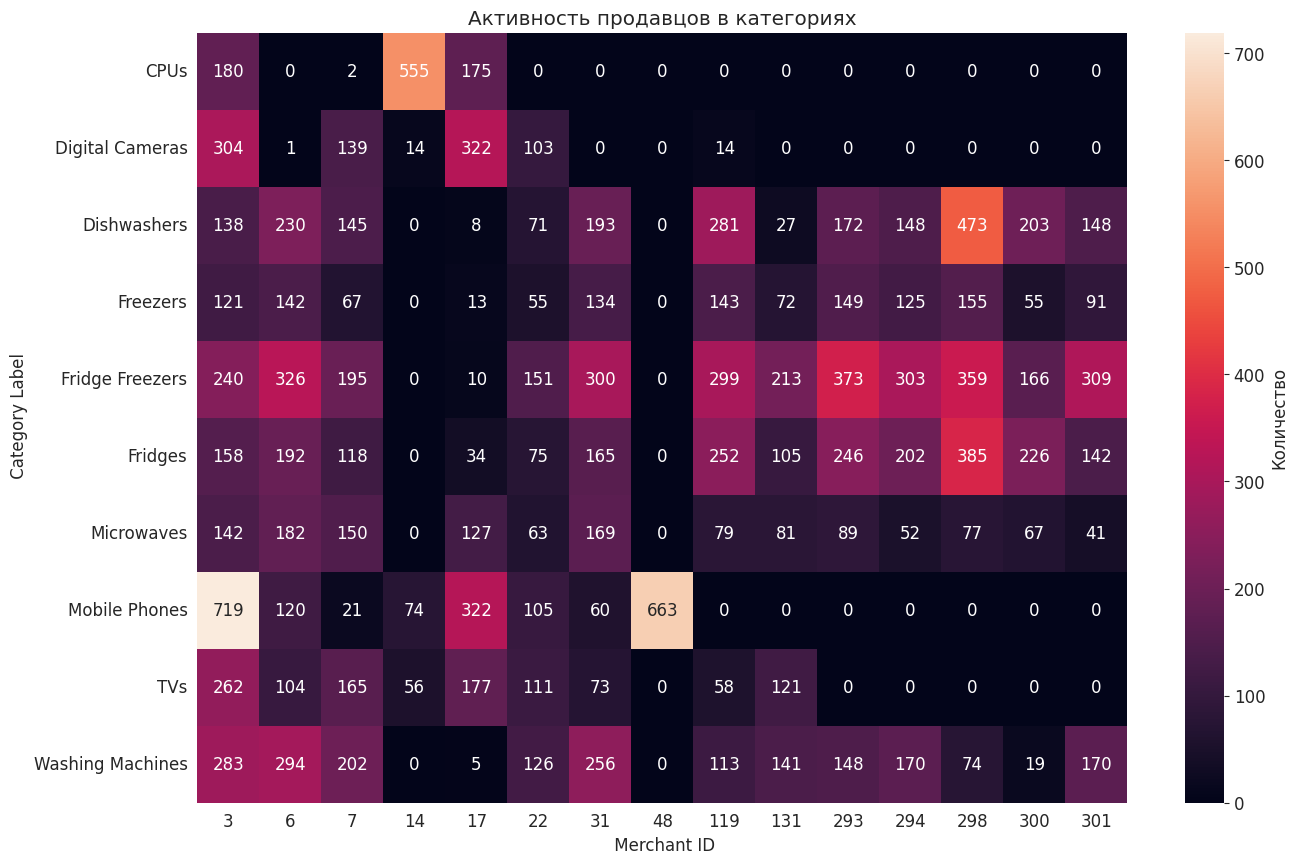

In [238]:

merchants = df[' Merchant ID'].value_counts().nlargest(15).index
сategory = df[' Category Label']

df_map = df[df[' Merchant ID'].isin(merchants) & df[' Category Label'].isin(сategory)]

df_pivot = df_map.pivot_table(
    index=' Category Label',
    columns=' Merchant ID',
    values='Product ID',
    aggfunc='count',
    fill_value=0
)

sns.heatmap(df_pivot, annot=True, fmt='d', cbar_kws={'label': 'Количество'})
plt.title('Активность продавцов в категориях')

Text(0.5, 1.0, 'Связь между категориями и кластерами')

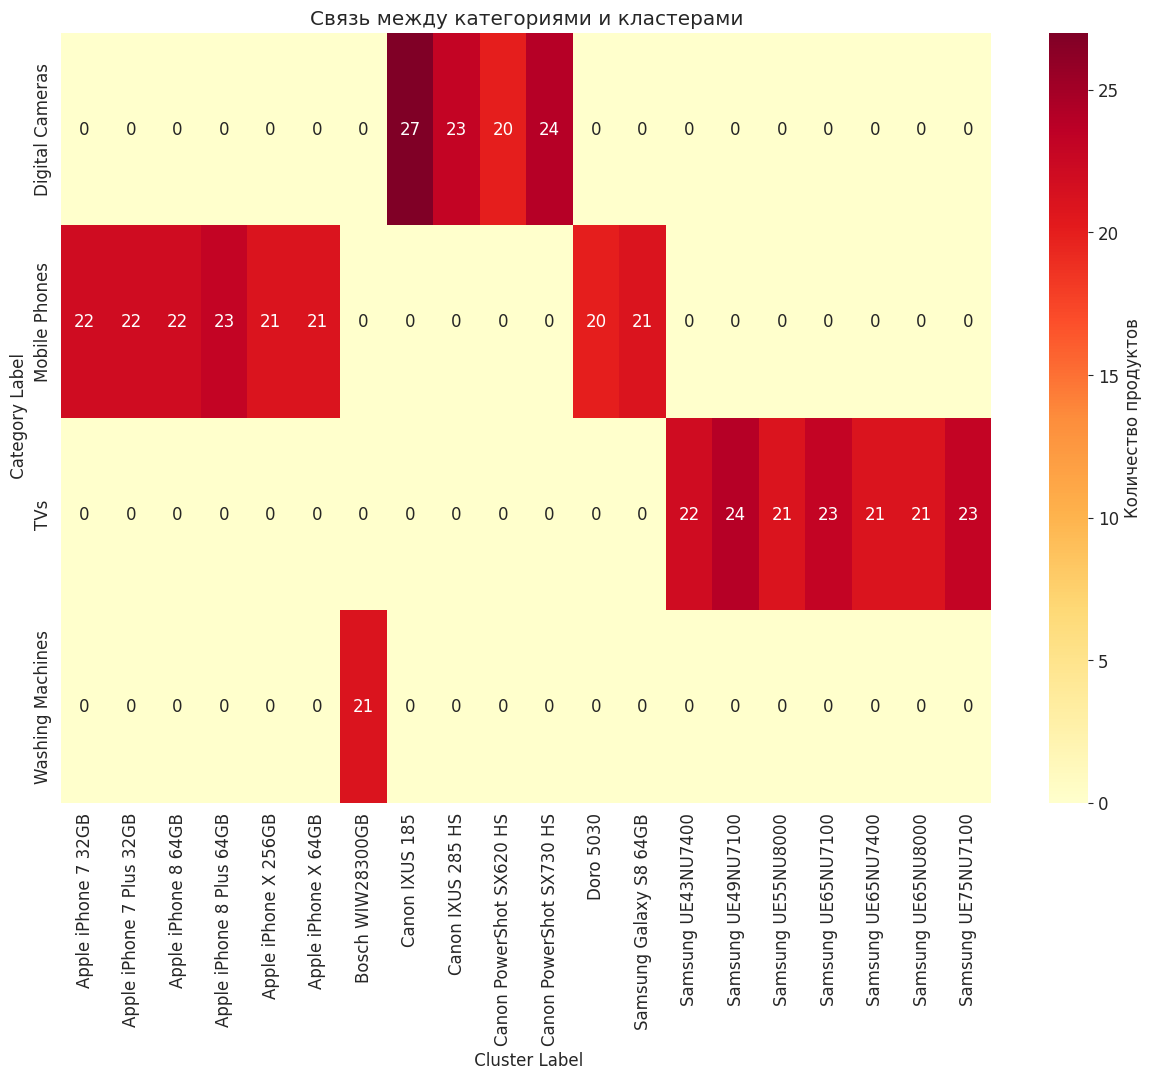

In [239]:
сategory = df[' Category Label']
clusters = df[' Cluster Label'].value_counts().nlargest(20).index

df_filtr = df[df[' Category Label'].isin(сategory) & df[' Cluster Label'].isin(clusters)]

cross_tab = pd.crosstab(df_filtr[' Category Label'], df_filtr[' Cluster Label'])

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Количество продуктов'})

plt.title('Связь между категориями и кластерами')